# Ideation

We wanted to focus on datasets that could be flexibe to many models. It is known that games such as Soccer
Our discussion determined that the best data for such is Soccer. With multiple tables, we could gather deep insights on the dynamics and tactics of *the beautiful game.*


# Data Import


In the below section we transform the SQL Tables to csv files

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hugomathien/soccer")

print("Path to dataset files:", path)

In [ ]:
import sqlite3
import csv
import os

# Connect to the SQLite database
db_path = 'database.sqlite'
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Get all table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Create output folder for CSV files
output_folder = 'csv_exports'
os.makedirs(output_folder, exist_ok=True)

# Export each table to a CSV file
for table_name in tables:
    table_name = table_name[0]  # Extract table name from tuple
    csv_file_path = os.path.join(output_folder, f"{table_name}.csv")

    # Fetch all data from the table
    cursor.execute(f"SELECT * FROM {table_name}")
    rows = cursor.fetchall()

    # Get column names
    column_names = [description[0] for description in cursor.description]

    # Write data to a CSV file
    with open(csv_file_path, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(column_names) 
        writer.writerows(rows)         

    print(f"Exported {table_name} to {csv_file_path}")

# Close the database connection
conn.close()

Exported sqlite_sequence to csv_exports\sqlite_sequence.csv
Exported Player_Attributes to csv_exports\Player_Attributes.csv
Exported Player to csv_exports\Player.csv
Exported Match to csv_exports\Match.csv
Exported League to csv_exports\League.csv
Exported Country to csv_exports\Country.csv
Exported Team to csv_exports\Team.csv
Exported Team_Attributes to csv_exports\Team_Attributes.csv


In [ ]:
import pandas as pd

df_match = pd.read_csv('csv_exports/Match.csv')
df_player_attribute = pd.read_csv('csv_exports/Player_Attributes.csv')
df_team_attribute = pd.read_csv('csv_exports/Team_Attributes.csv')
df_team = pd.read_csv('csv_exports/Team.csv')
df_player = pd.read_csv('csv_exports/Player.csv')
df_country = pd.read_csv('csv_exports/Country.csv')
df_league = pd.read_csv('csv_exports/League.csv')



# Data display and insights
---
We display and explore the match table using dataframe methods. Also we describe the table to look for information

## Overall Summary

### Shape of the data

In [57]:
dfs = [df_match, df_player_attribute, df_team_attribute, df_team, df_country, df_league]
names = ["Match", "Player Attributes", "Team Attribute", "Team", "Country", "League"]

# Show structure
for df, name in zip(dfs, names):
    print(f"Dataset: {name}")
    print(f"Shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
    print("\n")

Dataset: Match
Shape: (25979, 115)
Columns: ['id', 'country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal', 'home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4', 'home_player_X5', 'home_player_X6', 'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10', 'home_player_X11', 'away_player_X1', 'away_player_X2', 'away_player_X3', 'away_player_X4', 'away_player_X5', 'away_player_X6', 'away_player_X7', 'away_player_X8', 'away_player_X9', 'away_player_X10', 'away_player_X11', 'home_player_Y1', 'home_player_Y2', 'home_player_Y3', 'home_player_Y4', 'home_player_Y5', 'home_player_Y6', 'home_player_Y7', 'home_player_Y8', 'home_player_Y9', 'home_player_Y10', 'home_player_Y11', 'away_player_Y1', 'away_player_Y2', 'away_player_Y3', 'away_player_Y4', 'away_player_Y5', 'away_player_Y6', 'away_player_Y7', 'away_player_Y8', 'away_player_Y9', 'away_player_Y10', 'away_player_Y11', 'ho

### Missing Data

In [51]:
# Part 1 - 4: Missing Values and Duplicates

for name, df in zip(names, dfs):
    print(f"Dataset: {name}")
    print("Missing Values:")
    print(df.isnull().sum())
    print("\nDuplicates:")
    print(df.duplicated().sum())
    print("\n")


Dataset: Match
Missing Values:
id                0
country_id        0
league_id         0
season            0
stage             0
              ...  
GBD           11817
GBA           11817
BSH           11818
BSD           11818
BSA           11818
Length: 115, dtype: int64

Duplicates:
0


Dataset: Player Attributes
Missing Values:
id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    6869
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance            

### Statistical Summary

In [52]:
# Part 1 - 5: Statistical Summary


for name, df in zip(names, dfs):
    print(f"Statistical Summary for {name}")

    # Identify non-ID numerical columns
    non_id_columns = [col for col in df.select_dtypes(include=['number']).columns if 'id' not in col.lower()]

    if non_id_columns:
        # Compute descriptive statistics for non-ID numerical columns
        summary = df[non_id_columns].describe()
        print(summary)
    else:
        # If only IDs exist, show count
        id_columns = [col for col in df.columns if 'id' in col.lower()]
        id_summary = df[id_columns].count()
        print(f"Only ID columns detected. Counts:\n{id_summary}")

    print("\n")


Statistical Summary for Match
              stage  home_team_goal  away_team_goal  home_player_X1  \
count  25979.000000    25979.000000    25979.000000    24158.000000   
mean      18.242773        1.544594        1.160938        0.999586   
std       10.407354        1.297158        1.142110        0.022284   
min        1.000000        0.000000        0.000000        0.000000   
25%        9.000000        1.000000        0.000000        1.000000   
50%       18.000000        1.000000        1.000000        1.000000   
75%       27.000000        2.000000        2.000000        1.000000   
max       38.000000       10.000000        9.000000        2.000000   

       home_player_X2  home_player_X3  home_player_X4  home_player_X5  \
count    24158.000000    24147.000000    24147.000000    24147.000000   
mean         2.073516        4.061001        6.049199        7.544871   
std          0.387185        0.385973        0.446024        1.609682   
min          0.000000        1.000000 

### Data Visualization

Visualizing Data Distribution for Match...


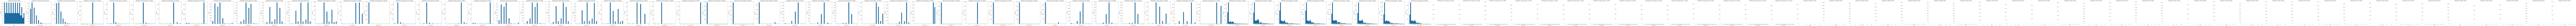

Visualizing Data Distribution for Player Attributes...


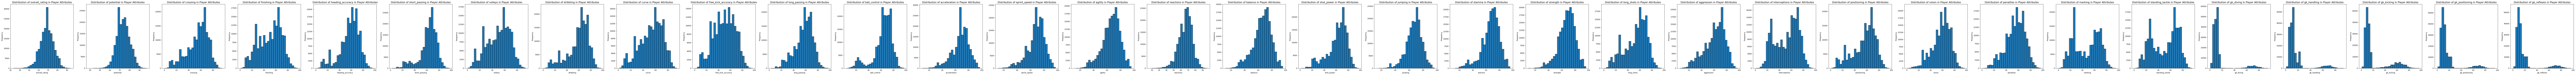

Visualizing Data Distribution for Team Attribute...


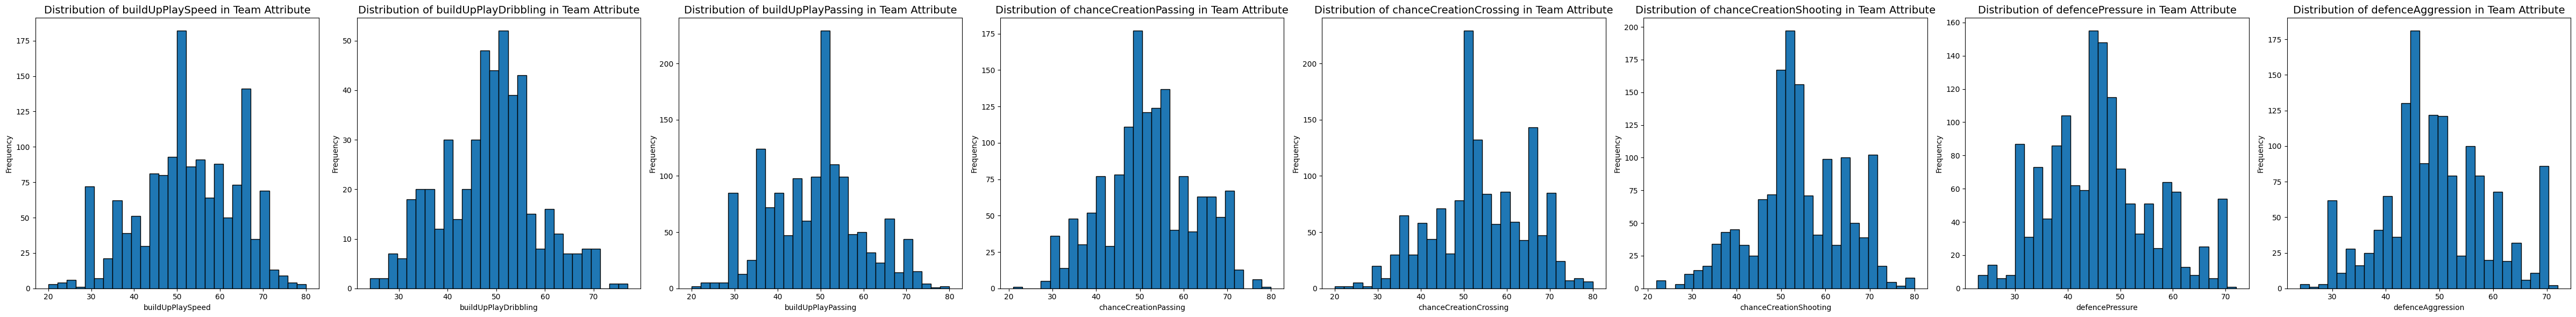

Visualizing Data Distribution for Team...
No non-ID numeric columns to visualize in Team
Visualizing Data Distribution for Country...
No non-ID numeric columns to visualize in Country
Visualizing Data Distribution for League...
No non-ID numeric columns to visualize in League


In [ ]:
import matplotlib.pyplot as plt

# Function to plot histograms for meaningful numerical columns
def plot_distribution(df, dataset_name):
    # Identify non-ID numerical columns
    numeric_columns = [col for col in df.select_dtypes(include=['number']).columns if 'id' not in col.lower()]

    if numeric_columns:
        # Create subplots in a single row
        fig, axes = plt.subplots(1, len(numeric_columns), figsize=(len(numeric_columns) * 6, 6))

        if len(numeric_columns) == 1:
            axes = [axes] 

        # Plot each column separately
        for ax, col in zip(axes, numeric_columns):
            df[col].hist(ax=ax, bins=28, edgecolor='black')
            ax.set_title(f'Distribution of {col} in {dataset_name}', fontsize=14)
            ax.set_xlabel(col)
            ax.set_ylabel('Frequency')
            ax.grid(False)

        plt.tight_layout()
        plt.show()
    else:
        print(f"No non-ID numeric columns to visualize in {dataset_name}")

# Loop through datasets and visualize distributions
for name, df in zip(names, dfs):
    print(f"Visualizing Data Distribution for {name}...")
    plot_distribution(df, name)



### Match Table Summary

In [55]:
df_match.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal',
       ...
       'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'],
      dtype='object', length=115)

In [56]:
df_match.head(10)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
5,6,1,1,2008/2009,1,2008-09-24 00:00:00,492478,8203,8342,1,...,1.67,4.35,3.40,1.70,4.50,3.40,1.70,NaN,NaN,NaN
6,7,1,1,2008/2009,1,2008-08-16 00:00:00,492479,9999,8571,2,...,3.60,2.10,3.25,3.00,1.85,3.25,3.75,2.10,3.25,3.10
7,8,1,1,2008/2009,1,2008-08-16 00:00:00,492480,4049,9996,1,...,2.40,2.80,3.25,2.25,2.80,3.20,2.25,2.88,3.25,2.20
8,9,1,1,2008/2009,1,2008-08-16 00:00:00,492481,10001,9986,1,...,3.10,2.25,3.25,2.80,2.20,3.30,2.80,2.25,3.20,2.80
9,10,1,1,2008/2009,10,2008-11-01 00:00:00,492564,8342,8571,4,...,10.00,1.30,4.35,8.50,1.25,5.00,10.00,1.29,4.50,9.00


In [16]:
df_match.describe()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,25979.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000,24158.000000,...,17097.000000,22568.000000,22568.000000,22568.000000,14162.000000,14162.000000,14162.000000,14161.000000,14161.000000,14161.000000
mean,12990.000000,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938,0.999586,...,4.622343,2.668107,3.899048,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663
std,7499.635658,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110,0.022284,...,3.632164,1.928753,1.248221,4.318338,1.489299,0.867440,3.010189,1.507793,0.868272,3.189814
min,1.000000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000,0.000000,...,1.100000,1.030000,1.620000,1.080000,1.050000,1.450000,1.120000,1.040000,1.330000,1.120000
25%,6495.500000,4769.000000,4769.000000,9.000000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000,1.000000,...,2.500000,1.700000,3.300000,2.550000,1.670000,3.200000,2.500000,1.670000,3.250000,2.500000
50%,12990.000000,10257.000000,10257.000000,18.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000,1.000000,...,3.500000,2.150000,3.500000,3.500000,2.100000,3.300000,3.400000,2.100000,3.400000,3.400000
75%,19484.500000,17642.000000,17642.000000,27.000000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000,1.000000,...,5.250000,2.800000,4.000000,5.400000,2.650000,3.750000,5.000000,2.620000,3.750000,5.000000
max,25979.000000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000,2.000000,...,41.000000,36.000000,26.000000,67.000000,21.000000,11.000000,34.000000,17.000000,13.000000,34.000000


It is intresting to see that home teams in average score more goals than away teams 1.544 to 1.16. Conforming the sports home advantage.

In [17]:
df_match[['home_team_goal', 'away_team_goal']].describe()

,home_team_goal,away_team_goal
count,25979.000000,25979.000000
mean,1.544594,1.160938
std,1.297158,1.142110
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,10.000000,9.000000


### Player Attributes Summary
---
Here we explore player attributes and try to gain tangble information from the table or intrest points.

In [18]:
df_player_attribute.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [19]:
df_player_attribute.head(10)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,6,189615,155782,2016-04-21 00:00:00,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
6,7,189615,155782,2016-04-07 00:00:00,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
7,8,189615,155782,2016-01-07 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
8,9,189615,155782,2015-12-24 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
9,10,189615,155782,2015-12-17 00:00:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0


In [20]:
df_player_attribute.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


### First Insights
---
The table ''' Player_attributes ''' looks interesting, especially with the two features, Rating and Potential. Implementing a regression model could help us predict the rating of a certain player based on their abilities.



# Model Preparation
---

## Data Cleaning

In this section, we clean the dataframe that we will use to implement the model. That is, we take out irrelevant Columns and null rows to prepare the dataframe for tracking the best features and implementation 

In [ ]:
from sklearn.preprocessing import OneHotEncoder

df = df_player_attribute
df.dropna(how='any', inplace=True)

# Initialize the encoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform categorical columns
encoded = encoder.fit_transform(df[['preferred_foot']])

# Convert back to DataFrame
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['preferred_foot']))
df = pd.concat([df, encoded_df], axis=1)

#Drop unwanted columns
df = df.drop(columns=['id', 'date','attacking_work_rate' , 'defensive_work_rate', 'preferred_foot', 'player_fifa_api_id', 'player_api_id', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'])

df.dropna(how='any', inplace=True)

# Check for NaN values
print(df.isnull().sum())  
print(df.isnull().any())  

df.describe()

overall_rating          0
potential               0
crossing                0
finishing               0
heading_accuracy        0
short_passing           0
volleys                 0
dribbling               0
curve                   0
free_kick_accuracy      0
long_passing            0
ball_control            0
acceleration            0
sprint_speed            0
agility                 0
reactions               0
balance                 0
shot_power              0
jumping                 0
stamina                 0
strength                0
long_shots              0
aggression              0
interceptions           0
positioning             0
vision                  0
penalties               0
marking                 0
standing_tackle         0
sliding_tackle          0
preferred_foot_left     0
preferred_foot_right    0
dtype: int64
overall_rating          False
potential               False
crossing                False
finishing               False
heading_accuracy        False
short

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,preferred_foot_left,preferred_foot_right
count,170408.00000,170408.000000,170408.00000,170408.000000,170408.000000,170408.000000,170408.000000,170408.000000,170408.000000,170408.000000,...,170408.000000,170408.000000,170408.000000,170408.000000,170408.000000,170408.000000,170408.000000,170408.000000,170408.000000,170408.000000
mean,68.66866,73.490957,55.23608,50.031202,57.349068,62.540450,49.584767,59.344233,53.098200,49.397693,...,61.026941,51.929727,55.787152,57.908079,54.953353,46.804393,50.423853,48.112448,0.243879,0.756121
std,7.01863,6.580984,17.21194,19.005879,16.455092,14.138858,18.231313,17.675394,18.227124,17.785808,...,16.053940,19.491758,18.438845,15.099098,15.525646,21.226615,21.496151,21.602450,0.429422,0.429422
min,33.00000,39.000000,1.00000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,...,6.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000
25%,64.00000,69.000000,45.00000,34.000000,49.000000,57.000000,36.000000,52.000000,41.000000,36.000000,...,51.000000,34.000000,45.000000,49.000000,45.000000,25.000000,29.000000,25.000000,0.000000,1.000000
50%,69.00000,74.000000,59.00000,53.000000,60.000000,65.000000,52.000000,64.000000,56.000000,50.000000,...,64.000000,56.000000,60.000000,60.000000,57.000000,50.000000,56.000000,53.000000,0.000000,1.000000
75%,73.00000,78.000000,68.00000,65.000000,69.000000,72.000000,64.000000,72.000000,67.000000,63.000000,...,73.000000,68.000000,69.000000,69.000000,67.000000,66.000000,69.000000,67.000000,0.000000,1.000000
max,94.00000,97.000000,95.00000,97.000000,98.000000,97.000000,93.000000,97.000000,94.000000,97.000000,...,97.000000,96.000000,95.000000,96.000000,96.000000,94.000000,95.000000,95.000000,1.000000,1.000000


## Data Correlation and Feature Importance

---

#### Correleation:
We need to see what features are correleated and which do not affect the rating.

### Feature Importance:
We need to see what features have the strongest impact on the rating. We use Mutual Informaton to display that.

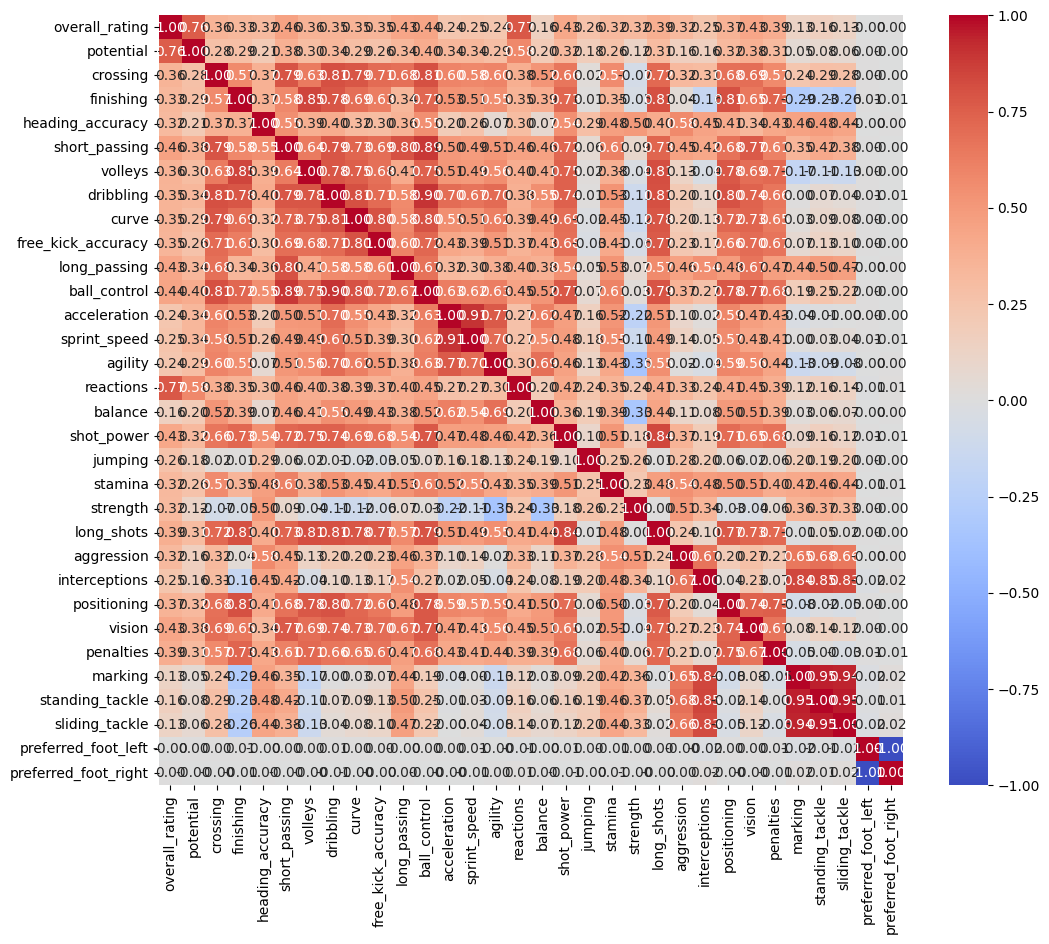

potential               0.798313
reactions               0.550077
ball_control            0.440702
short_passing           0.338437
standing_tackle         0.303987
positioning             0.279694
dribbling               0.274555
interceptions           0.258329
long_shots              0.236893
shot_power              0.234301
marking                 0.230831
sliding_tackle          0.227375
crossing                0.218396
vision                  0.217666
long_passing            0.217170
volleys                 0.190549
curve                   0.175212
finishing               0.174177
heading_accuracy        0.170083
penalties               0.166197
free_kick_accuracy      0.145536
stamina                 0.130829
aggression              0.128860
strength                0.091195
sprint_speed            0.087481
acceleration            0.086286
agility                 0.073616
jumping                 0.069178
balance                 0.050295
preferred_foot_right    0.000575
preferred_

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression


# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

# Feature importance with Random Forest
y = df['overall_rating']
X = df.drop(columns=['overall_rating'])

# Mutual information ()
mi = mutual_info_regression(X, y)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print(mi_series)


## Building The Model

We chose Random Forest for our regression model is at works and generalizes well with complex, non-linear relationships. We will be using sklearn to generate the model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Features and target variable
X = df[['potential', 'reactions', 'ball_control', 'short_passing', 'standing_tackle']]
y = df['overall_rating']

# Split data into Train (70%), Validation (15%), Test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Evaluate on Val set
y_val_pred = model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f"Validation MSE: {val_mse:.2f}")
print(f"Validation R^2: {val_r2:.2f}")

# Evaluate on Test set
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test MSE: {test_mse:.2f}")
print(f"Test R^2: {test_r2:.2f}")


Validation MSE: 2.67
Validation R^2: 0.95
Test MSE: 2.63
Test R^2: 0.95


## Hyperparameters Tuning

### Finding the best parameters using grid search

---

The code section is commented as runtime for the cell takes ~1 hour.

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV

# # Define pipeline with RandomForestRegressor
# pipeline = Pipeline([
#     ('scaler', MinMaxScaler()),  # Feature scaling
#     ('randomforestregressor', RandomForestRegressor(random_state=42))  # Model step
# ])


# # Define parameter grid for RandomForestRegressor
# param_grid = {
#     'randomforestregressor__n_estimators': [50, 100, None],
#     'randomforestregressor__max_depth': [10, 20, None],
#     'randomforestregressor__min_samples_split': [2, 5],
#     'randomforestregressor__min_samples_leaf': [1, 2, 4]
# }

# # Initialize GridSearchCV with the pipeline and parameter grid
# grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)

# # Fit the model
# grid_search.fit(X_train, y_train)

# # Get the best parameters
# print("Best parameters:", grid_search.best_params_)

# # Get the best model from the grid search
# best_model = grid_search.best_estimator_

# # Evaluate on the validation set
# y_val_pred = best_model.predict(X_val)
# val_mse = mean_squared_error(y_val, y_val_pred)
# print(f"Validation MSE after tuning: {val_mse:.2f}")


### Training The model again on best model parameters. [found in Best_parameters.txt file] 

---

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=200, random_state=42, max_depth=None, min_samples_leaf=1, min_samples_split=2)
model.fit(X_train, y_train)

# Evaluate on Validation set
y_val_pred = model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f"Validation MSE: {val_mse:.2f}")
print(f"Validation R^2: {val_r2:.2f}")

# Evaluate on Test set
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test MSE: {test_mse:.2f}")
print(f"Test R^2: {test_r2:.2f}")


Validation MSE: 2.67
Validation R^2: 0.95
Test MSE: 2.63
Test R^2: 0.95


### Tuning Findings

As the Mean Squared Error Shows. The model was tuned well with the default Random forest settings. However, let be noted that With multiple runs, the best parameters showed 0.002 MSE Improvements. 2.69 in original in first code run vs 2.67 in current.

## Saving The Model

Here we dave the model in a .pkl file to test on outside data. This is an extra step but it better prepares the model for API implementation and deployment. Done merely to showcase the ability to use it outside the local machine

In [31]:
import joblib

# Assuming 'pipeline' is your preprocessing + Random Forest model pipeline
joblib.dump(model, 'random_forest_pipeline.pkl')

print("Model saved as random_forest_pipeline.pkl")


Model saved as random_forest_pipeline.pkl


In [32]:
# Load the saved pipeline
loaded_pipeline = joblib.load('random_forest_pipeline.pkl')

# Make predictions
predictions = loaded_pipeline.predict(X_test[:10])
for data in predictions:
    print('{:9.2f}'.format(data))

    60.55
    69.86
    73.72
    71.68
    68.27
    69.56
    60.98
    65.66
    79.29
    72.04


# Bonus: API implementaion using Flask

In [ ]:
from flask import Flask, request, jsonify
import joblib
import pandas as pd

# Load the saved pipeline
pipeline = joblib.load('random_forest_pipeline.pkl')

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    # Get JSON data from request
    input_data = request.json
    
    # Convert to DataFrame
    input_df = pd.DataFrame(input_data)
    
    # Make prediction
    predictions = pipeline.predict(input_df)
    
    return jsonify({'predictions': predictions.tolist()})

if __name__ == '__main__':
    app.run(debug=True)
